In [8]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import random


In [10]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

2023-09-06 19:12:32.369464: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-06 19:12:32.369996: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7527197540215517600
 xla_global_id: -1]

In [3]:
def random_multiply (x, y, scale=1):
    n1 = random.random()
    n2 = random.random()
    n3 = random.random()
    result = n1 * n2 * n3
    x += [[n1, n2, n3]]
    y += [[result]]

In [4]:
x = []
y = []
for i in range(10000000):
    random_multiply(x, y)
x = np.array(x)
y = np.array(y)

In [5]:

from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, shuffle=False)

In [6]:
x

array([[0.87847652, 0.18722931, 0.60157021],
       [0.77090505, 0.50628346, 0.5042461 ],
       [0.35729152, 0.10398455, 0.15701507],
       ...,
       [0.8020777 , 0.46747738, 0.07172903],
       [0.13479554, 0.73794206, 0.60603547],
       [0.70371991, 0.75948645, 0.33124002]])

In [7]:
xSize = x.shape[1]
ySize = y.shape[1]

firstLayerSize = xSize * ySize * 1000
secondLayerSize = xSize * ySize * 1000
thirdLayerSize = xSize * ySize * 1000
layerSize4 = xSize * ySize * 20
layerSize5 = xSize * ySize * 20
layerSize6 = xSize * ySize * 20

inputs = Input(shape=(xSize))
layer1 = Dense(firstLayerSize, activation='relu')(inputs)
layer2 = Dense(secondLayerSize, activation='relu')(layer1)
layer3 = Dense(secondLayerSize, activation='relu')(layer2)
#layer4 = Dense(secondLayerSize, activation='relu')(layer3)
#layer5 = Dense(secondLayerSize, activation='relu')(layer4)
#layer6 = Dense(secondLayerSize, activation='relu')(layer5)
predictions = Dense(ySize)(layer3)
model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_squared_error', optimizer='adam')
#model.compile(loss='median_absolute_error', optimizer='adam')

model.fit(xTrain, yTrain, epochs=25, shuffle=True, batch_size=64)

2023-09-06 19:11:03.369693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-06 19:11:03.370309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-06 19:11:03.370396: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-09-06 19:11:03.370471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-09-06 19:11:03.483903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/25
   148/125000 [..............................] - ETA: 1:55:35 - loss: 0.0124

KeyboardInterrupt: 

In [ ]:
model.save('CVE2023.h5')

In [22]:
def get_rand (size):
    result1 = []
    result2 = []
    for n2 in range (0,size):
        value1 = random.random()/100
        value2 = random.random()/100
        value3 = random.random()/100
        result1 += [[value1, value2, value3]]
        result2 += [[value1*value2*value3]]
    return np.array(result1),np.array(result2)
def root_mean_squared_error(actual, predicted):
    mse = ((actual - predicted) ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse
def rand_test (constx):
    x , ans= get_rand(constx)
    print("x = ",x)
    y = model.predict(x)
    for i in range(0,constx):
        print(y[i] , ans[i], root_mean_squared_error(ans[i],y[i]))

In [1]:
rand_test(1000)

NameError: name 'rand_test' is not defined

32/32 [==============================] - 0s 3ms/step


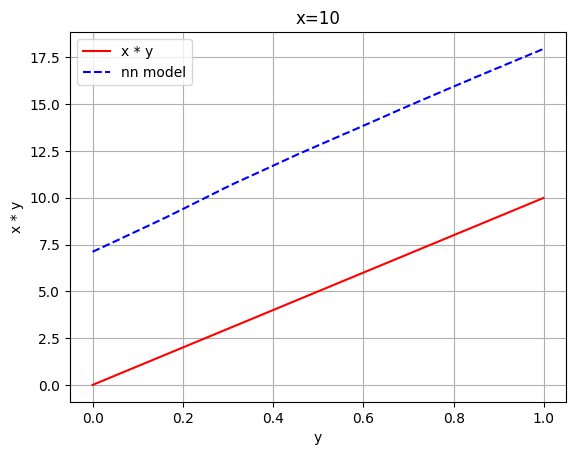

32/32 [==============================] - 0s 1ms/step


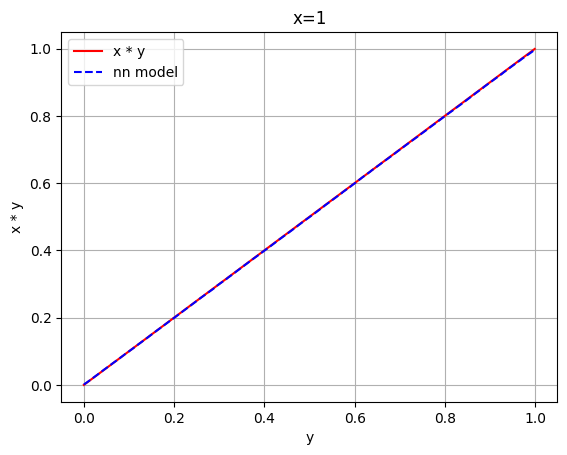

32/32 [==============================] - 0s 2ms/step


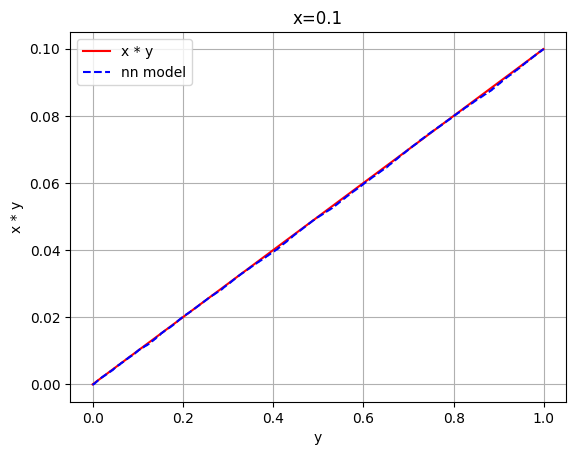

32/32 [==============================] - 0s 2ms/step


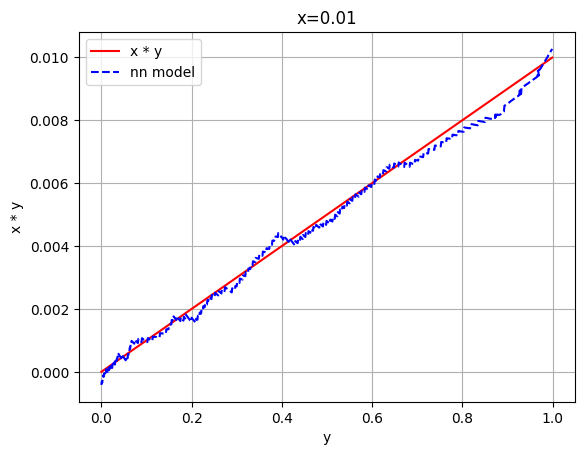

32/32 [==============================] - 0s 1ms/step


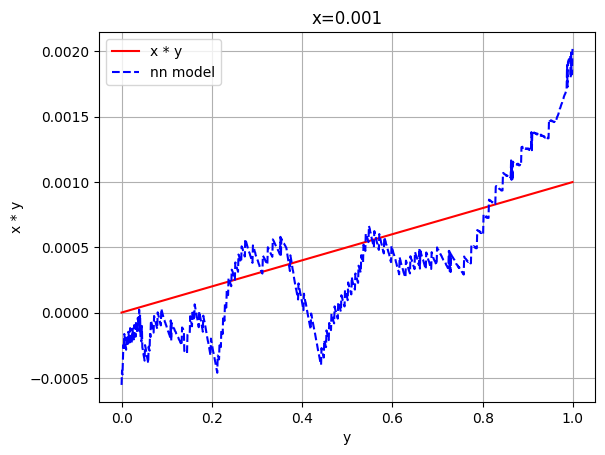

32/32 [==============================] - 0s 2ms/step


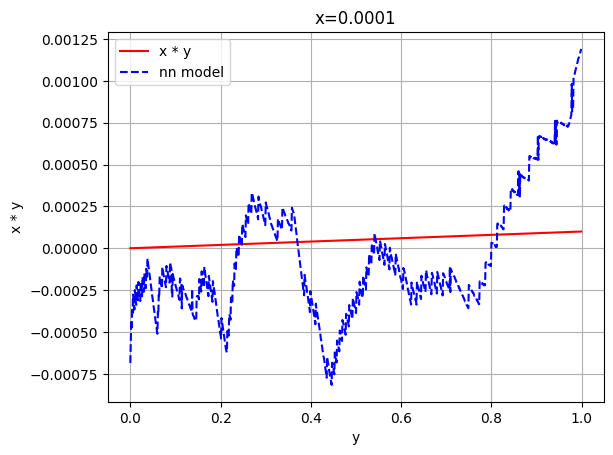